<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/machine_learning/logistic_regression_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%html
<style>
table {float:left}
</style>

# Logistic Regression

Breast Cancer Data - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer
The classification goal is to predict whether cancer is benign or malignant.

This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and M. Soklic for providing the data.

Attribute Information:

| Attribute # | Attribute Name | Attribute Values |
| :---: | :---: | :---: |
|   1 | Class | no-recurrence-events, recurrence-events |
|   2 | age | 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99 |
|   3 | menopause | lt40, ge40, premeno |
|   4 | tumor-size | 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59 |
|   5 | inv-nodes | 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39 |
|   6 | node-caps | yes, no |
|   7 | deg-malig | 1, 2, 3 |
|   8 | breast | left, right |
|   9 | breast-quad | left-up, left-low, right-up,	right-low, central |
|  10 | irradiat |	yes, no |

Missing attribute values: (denoted by "?")

| Attribute # | Missing values |
|:---:|:---:|
| 6 | 8 |
| 9 | 1 |

## Imports and theme

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import warnings
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning, FitFailedWarning
# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [ ]:
# Set plot scheme
palette = {"dark": "#252b33", "grey": "#45464d", "light": "#fefeff", "stone": "#8f8f94",
           "blue": "#336681", "green": "#089389", "red": "#d34748", "pink": "#cf82d3", "yellow": "#e6daaa"
}
# Set plot defaults
sns.set_style(rc={"figure.facecolor": palette["dark"],
                  "axes.facecolor": palette["dark"],
                  "axes.edgecolor": palette["light"],
                  "grid.color": palette["grey"]})

## Load data

In [ ]:
df = pd.read_csv("breast-cancer.data", header=None)

## Understand the data

In [ ]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no


In [ ]:
df.columns = [
    "class", "age", "menopause", "tumor-size", "inv-nodes",
    "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"
]
df

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
df["class"].value_counts()

class
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64

In [ ]:
pos_class = df[df["class"] == "recurrence-events"].shape[0]
print(f"Positive class: {pos_class} of {len(df)} instances ({pos_class / len(df):.2%})")

Positive class: 85 of 286 instances (29.72%)


In [ ]:
df[df["node-caps"] == "?"]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [ ]:
df["node-caps"].value_counts()

node-caps
no     222
yes     56
?        8
Name: count, dtype: int64

In [ ]:
df[df["breast-quad"] == "?"]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [ ]:
df.age.value_counts().sort_index()

age
20-29     1
30-39    36
40-49    90
50-59    96
60-69    57
70-79     6
Name: count, dtype: int64

In [ ]:
df.menopause.value_counts()

menopause
premeno    150
ge40       129
lt40         7
Name: count, dtype: int64

In [ ]:
df["tumor-size"].value_counts().sort_index()

tumor-size
0-4       8
10-14    28
15-19    30
20-24    50
25-29    54
30-34    60
35-39    19
40-44    22
45-49     3
5-9       4
50-54     8
Name: count, dtype: int64

In [ ]:
df["inv-nodes"].value_counts()

inv-nodes
0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: count, dtype: int64

In [ ]:
df["deg-malig"].value_counts().sort_index()

deg-malig
1     71
2    130
3     85
Name: count, dtype: int64

The dataset consists of 10 columns, of which the first column is the class (no-recurrence-events|recurrence-events), and the remaining 9 columns are the features.

Four of the columns contain binary data, one contains integers, and the remaining columns are categorical (including ordinal).

The dataset contains 286 instances, of which 201 are from the negative class, and 85 (29.72%) are from the positive class.

As indicated in the problem description, values of "?" appear in place of missing values, in two of the columns.

## Clean the data

In [ ]:
df.drop_duplicates
df.shape

(286, 10)

No duplicates were present in the data.

Regarding missing data, given the small number of instances with absent data (9 of 286, approximately 3.1%) we will remove those instances from the dataset.

In [ ]:
# Drop rows containing "?" in any column
df = df[~df.apply(lambda row: "?" in row.values, axis=1)]

In [ ]:
df.shape

(277, 10)

## Scale and transform the data

Binary class and features:
- class (no-recurrence-events|recurrence-events),
- node-caps (yes|no),
- breast (left|right), and
- irradiat (yes|no).

We will apply binary encoding to the class and three binary features.

Categorical features:
- breast-quad (left_low|left_up|right_low|right_up|central), and
- menopause (premeno|lt40|ge40).

Though there is an ordinal relationship between "premenopausal", "age less than 40" and "age greater than 40", we are not provided with the distinction between "premenopausal" and the two distinct age brackets, and so should avoid imputing a possibly incorrect rationale to this feature.

We will apply one-hot encoding to these categorical features.

Ordinal features:
- age (10-19|20-29|30-39|40-49|50-59|60-69|70-79|80-89|90-99),
- tumor-size (0-4|5-9|10-14|15-19|20-24|25-29|30-34|35-39|40-44|45-49|50-54|55-59), and
- inv-nodes (0-2|3-5|6-8|9-11|12-14|15-17|18-20|21-23|24-26|27-29|30-32|33-35|36-39).

The "age" category is approximately normally distributed, as is the "tumor-size" category. The "inv-nodes" category is heavily skewed towards the left of the range.

The intervals of the ordinal features are constant, so we will use ordinal-encoding for these three features.

Integer features:
- deg-malig (1|2|3)

The "deg-malig" feature is approximately normally distributed; we will apply min-max scaling to this feature.

In [ ]:
# New DataFrame for this mixed encoding and scaling approach
df_mix = df.copy()

### Binary encoding

In [ ]:
df_mix["class"] = df_mix["class"].replace({"no-recurrence-events": 0, "recurrence-events": 1})
df_mix["node-caps"] = df_mix["node-caps"].replace({"no": 0, "yes": 1})
df_mix["breast"] = df_mix["breast"].replace({"left": 0, "right": 1})
df_mix["irradiat"] = df_mix["irradiat"].replace({"no": 0, "yes": 1})

### One-hot encoding ("breast-quad" and "menopause" features)

In [ ]:
df_mix = pd.get_dummies(df_mix, columns=["breast-quad", "menopause"], dtype="int32")

### Ordinal encoding ("age", "tumor-size", and "inv-nodes" features)

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]])
df_mix["age"] = ordinal_encoder.fit_transform(df_mix[["age"]])
ordinal_encoder = OrdinalEncoder(categories=[["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"]])
df_mix["tumor-size"] = ordinal_encoder.fit_transform(df_mix[["tumor-size"]])
ordinal_encoder = OrdinalEncoder(categories=[["0-2", "3-5", "6-8", "9-11", "12-14", "15-17", "24-26"]])
df_mix["inv-nodes"] = ordinal_encoder.fit_transform(df_mix[["inv-nodes"]])

### Min-max scaling ("deg-malig" feature)

In [ ]:
# Reshape to a 2D array
deg_malig = df_mix[["deg-malig"]].values.reshape(-1, 1)
# Apply MinMaxScaler
standard_scaler = MinMaxScaler()
df_mix["deg-malig"] = standard_scaler.fit_transform(deg_malig)

## Understand the data (II)

Now that the data is all numerical, we can review correlations for a graphical understanding.

Note that the correlations within the one-hot encoded features ("breast-quad" and "menopause") should be ignored.

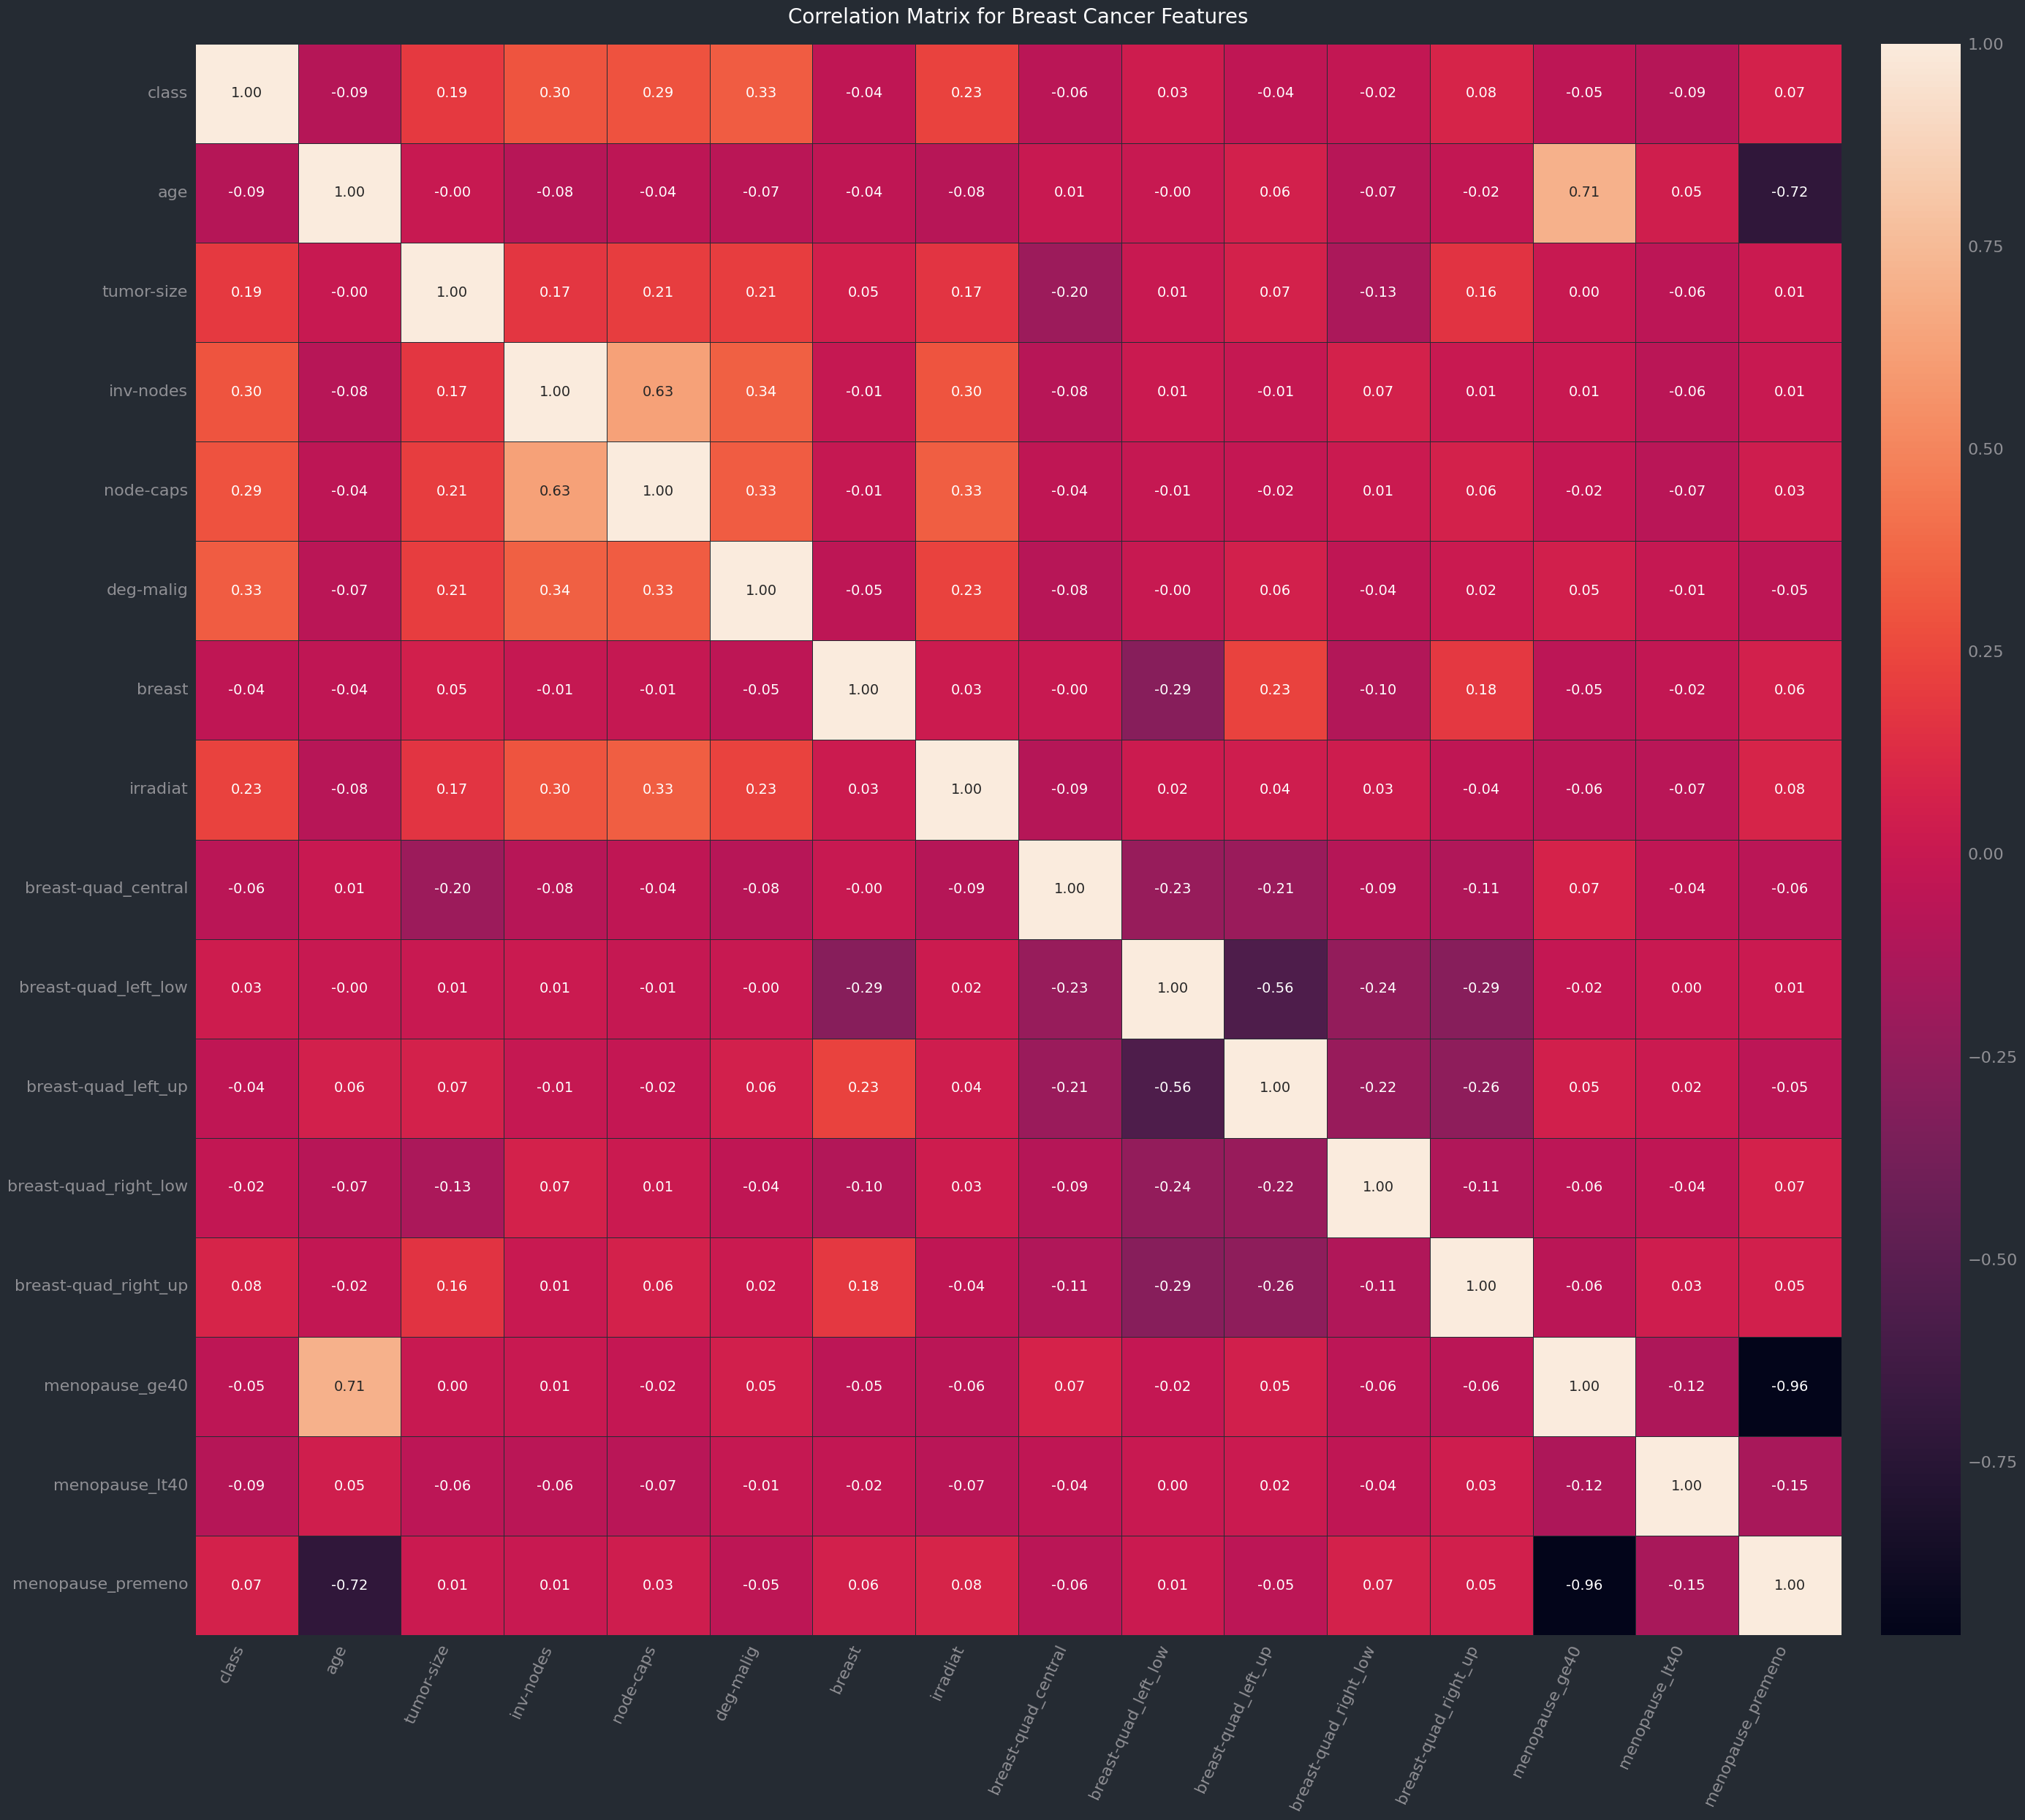

In [ ]:
# Check correlations for numerical dataframe with Seaborn heatmap
corr_matrix = df_mix.corr()
# Set up matplotlib figure
fig, ax = plt.subplots(figsize=(30, 25))
# Set up heatmap
hmap = sns.heatmap(corr_matrix,
                   annot=True,
                   annot_kws={"size": 14},
                   fmt=".2f",
                   linewidth=0.5,
                   # cmap=custom_cmap,
                   linecolor=palette["dark"],
                   cbar_kws={"pad": 0.02}
)
# Remove ticks from x and y axes (left and bottom)
hmap.tick_params(left=False, bottom=False)
# Remove ticks from cbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(right=False)
# Set descriptors
hmap.set_title("Correlation Matrix for Breast Cancer Features",
               fontdict={"size": 20, "color": palette["light"]},
               pad=20)
plt.xticks(fontsize=16, color=palette["stone"], rotation=65, ha="right")
plt.yticks(fontsize=16, color=palette["stone"], rotation=0)
cbar.ax.tick_params(labelsize=16, labelcolor=palette["stone"])

plt.tight_layout()
plt.show()

## Prepare data for training

In [ ]:
# Feature columns from column 1 onwards
X=df_mix.iloc[:,1:]
# Target = df_mix["class"], squeeze() to convert 2D array to 1D
y=df_mix.iloc[:,:1].squeeze()

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

## Logistic regression with mix-scaled features

In [ ]:
# Initialise and train logistic regression model
lr_model = LogisticRegression(random_state=27)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=27)

### Hyperparameter tuning via grid search

There are several parameters we can optimise with scikit-learn's logistic regression model. We will run a grid search to find the best performance against our dataset.

Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# Define the parameter grid to search
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": [None, "l1", "l2"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 200, 300],
    "class_weight": [None, "balanced"]
}

In [ ]:
# Create a logistic regression model
logr_grid_model = LogisticRegression()
# Use GridSearchCV to seek best parameters
grid_search = GridSearchCV(logr_grid_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300],
                         'penalty': [None, 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
params = grid_search.best_params_
print(params)

{'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
logr_model = LogisticRegression(**params)
logr_model.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
# Predict on test set
y_pred = logr_model.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logr_model.predict_proba(X_test)[:, 1])

In [ ]:
# Print the metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}\n")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Accuracy:  0.7286
Precision: 0.6000
Recall:    0.1500
F1 Score:  0.2400

Confusion Matrix:
[[48  2]
 [17  3]]

AUC-ROC Score: 0.7960


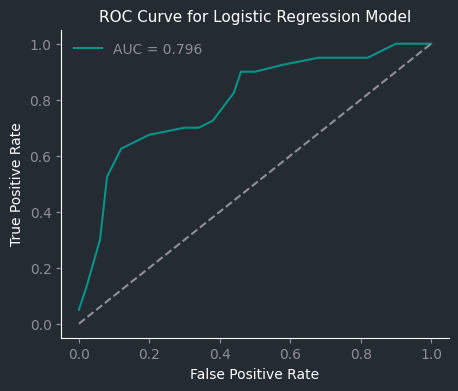

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logr_model.predict_proba(X_test)[:, 1])
# Set up matplotlib figure
fig, ax = plt.subplots(figsize=(5, 4))
# AUC line plot
sns.lineplot(x=fpr, y=tpr, label=f"AUC = {roc_auc:.3f}", color=palette["green"], errorbar=None)
sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", color=palette["stone"])
# Set descriptors
plt.title("ROC Curve for Logistic Regression Model", fontdict={"size": 11, "color": palette["light"]})
plt.xticks(fontsize=10, color=palette["stone"], rotation=0)
plt.yticks(fontsize=10, color=palette["stone"], rotation=0)
ax.tick_params(axis='both', colors=palette["stone"])
plt.ylabel("True Positive Rate", fontsize=10, color=palette["light"],)
plt.xlabel("False Positive Rate", fontsize=10, color=palette["light"],)
legend = plt.legend()
for text in legend.get_texts():
    text.set_color(palette["stone"])
legend.get_frame().set_linewidth(0)
# Remove top and right spines
sns.despine(right=True, top=True)
plt.show()

## Summary: mix-scale logistic regression model

Scaling the features as detailed above, with a combination of ordinal encoding, one-hot encoding, min-max scaling, and binary encoding, and optimising the hyperparameters using grid search, we achieved the following results:

|Metric|Score|
|---|---|
|Accuracy|0.7286|
|Precision|0.6000|
|Recall|0.1500|
|F1 Score|0.2400|e: 0.7960

The confusion matrix outcome was as follows:

|Confusion Matrix|True|False|
|---|---|---|
|Positive|3|2|
|Negative|48|17|

Note that in the context of cancer diagnosis, a False Positive classification is considerably safer than a False Negative, in which case a patient suffering from cancer is misdiagnosed as being cancer-free.

The 17 False Negatives versus just 2 True Positives gives a recall (sensitivity) of 0.15. This would be of significant concern in a real-world scenario.

## Increasing sensitivity

We can make the model more sensitive to False Negatives by reducing the threshold parameter; scikit-learn's logistic regression model uses a default threshold of 0.5.

In [ ]:
y_pred_sensitive = logr_model.predict_proba(X_test)[:, 1]

In [ ]:
# Adjust the threshold to optimize for recall
adjusted_threshold = 0.3  # You can adjust this threshold
y_pred_sensitive = np.where(y_pred_sensitive > adjusted_threshold, 1, 0)

# Now you can calculate metrics with the adjusted predictions
accuracy_sensitive = accuracy_score(y_test, y_pred_sensitive)
precision_sensitive = precision_score(y_test, y_pred_sensitive)
recall_sensitive = recall_score(y_test, y_pred_sensitive)
f1_sensitive = f1_score(y_test, y_pred_sensitive)
conf_matrix_sensitive = confusion_matrix(y_test, y_pred_sensitive)
roc_auc_sensitive = roc_auc_score(y_test, y_pred_sensitive)

In [ ]:
# Print the metrics
print(f"Accuracy:  {accuracy_sensitive:.4f}")
print(f"Precision: {precision_sensitive:.4f}")
print(f"Recall:    {recall_sensitive:.4f}")
print(f"F1 Score:  {f1_sensitive:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix_sensitive}\n")
print(f"AUC-ROC Score: {roc_auc_sensitive:.4f}")

Accuracy:  0.7714
Precision: 0.5833
Recall:    0.7000
F1 Score:  0.6364

Confusion Matrix:
[[40 10]
 [ 6 14]]

AUC-ROC Score: 0.7500


Adjusting the threshold to 0.3 for a more sensitivity/recall-oriented model has improved the overall accuracy of the model from 72.86% to 77.14%.

More importantly, it has drastically increased the sensitivity/recall score from 15% to 70%. This is likely still unacceptable for a real-world model, since it implies that 30% of positive cases are missed, but demonstrates the improvement that can be made through such an adjustment, and at the cost of only a slight reduction in the precision of the model, from 60% to 58.33%.

|Metric|Score|
|---|---|
|Accuracy|0.7714|
|Precision|0.5833|
|Recall|0.7000|
|F1 Score|0.6364|

We know that in real-world applications False Positives are favoured, since this is much safer for patients overall. It is probable that an even lower threshold is preferred to attempt to remove False Negatives entirely.

The confusion matrix for the sensitive model was as follows:

|Confusion Matrix|True|False|
|---|---|---|
|Positive|14|10|
|Negative|40|6|